# Predicting Bike Sharing Data 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues.  Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
Mydata=pd.read_csv('hour.csv',delimiter=",")
%matplotlib inline
Mydata.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


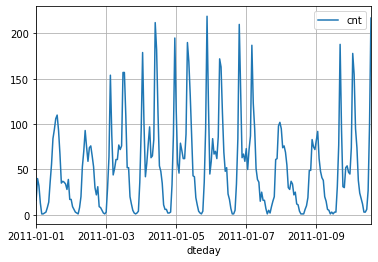

In [21]:
Mydata[:240].plot(x='dteday', y='cnt')
plt.grid(True)
plt.show()

One Hot Encoding of Dummy variables
Categorical variables like season, weather, month. Weekdays 

In [22]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(Mydata[each], prefix=each, drop_first=False)
    Mydata = pd.concat([Mydata, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = Mydata.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
data.shape

(17379, 59)

In order to avoid overfitting and improving the training performance we Stadardize and Scale Continues variables in Normal distribution with mean 0 and standard deviation 1.

In [24]:
#Scaling target variables
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

# Building Prediction Model and Starting Train  Prpcess:
splitting dataset into train and test data

In [25]:
target_field = ['casual', 'registered', 'cnt']
X, y = data.drop(target_field, axis=1), data[target_field]
y=y['cnt']
#X=X.drop(['yr'],axis=1)
from sklearn.model_selection import train_test_split
#X_test,y_test = X[-21*24:],y=[-21*24:]
#X_train,y_train=X[:-21*24],y=[:-21*24]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
np.shape(X_train)

(13903, 56)

In [26]:
y_train.shape[0]

13903

In [27]:
X_test.shape

(3476, 56)

In [28]:
y_test.shape

(3476,)

In [29]:
## Importing required libraries
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.metrics import roc_auc_score, accuracy_score
s = tf.InteractiveSession()

/Users/macbook/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow_core/python/client/session.py:1752: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [38]:
## Defining various initialization parameters MLP model
#num_classes = y_train.shape[0]
num_features = X_train.shape[1]
num_output = 1
num_layers_0 = 5
#num_layers_1 = 5
starter_learning_rate = 0.1
regularizer_rate = 0.0001

In [39]:
# Placeholders for the input data
input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")
input_y = tf.placeholder('float32',name='input_Y')
## for dropout layer
keep_prob = tf.placeholder(tf.float32)
## Weights initialized by random normal function with std_dev = 1/sqrt(number of input features)
weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(1/tf.sqrt(float(num_features)))))
bias_0 = tf.Variable(tf.random_normal([num_layers_0]))
#weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(1/tf.sqrt(float(num_layers_0)))))
#bias_1 = tf.Variable(tf.random_normal([num_layers_1]))
weights_2 = tf.Variable(tf.random_normal([num_layers_0,num_output], stddev=(1/tf.sqrt(float(num_layers_0)))))
bias_2 = tf.Variable(tf.random_normal([num_output]))
## Initializing weigths and biases
hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
hidden_output_0_0 = tf.nn.dropout(hidden_output_0, keep_prob)
#hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0_0,weights_1)+bias_1)
#hidden_output_1_1 = tf.nn.dropout(hidden_output_1, keep_prob)
predicted_y = tf.sigmoid(tf.matmul(hidden_output_0_0,weights_2) + bias_2)

In [40]:
## Defining the loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_y,labels=input_y)) \
        + regularizer_rate*(tf.reduce_sum(tf.square(bias_0)) + tf.reduce_sum(tf.square(bias_2)))

In [41]:
## Variable learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.75, staircase=True)
## Adam optimzer for finding the right weight
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_2,
                                                                         bias_0,bias_2])

In [42]:
## Metrics definition
correct_prediction = tf.equal(tf.argmax(y_train,0), tf.argmax(predicted_y,0))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [43]:
## Training parameters
batch_size = 100
epochs=10
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):    
        for index in range(0,X_train.shape[0],batch_size):
            sess.run(optimizer, {input_X: X_train[index:index+batch_size],
                          input_y: y_train[index:index+batch_size],
                        keep_prob:dropout_prob})
        training_accuracy.append(sess.run(accuracy, feed_dict= {input_X:X_train,input_y: y_train,keep_prob:1}))
        training_loss.append(sess.run(loss, {input_X: X_train, 
                                      input_y: y_train,keep_prob:1}))
    
        ## Evaluation of model

        print("Epoch:{0}, Train loss: {1:.2f} Train acc: {2:.3f}".format(epoch,
                                                                    training_loss[epoch],
                                                                    training_accuracy[epoch]))
                                                                  
    Test_predic =sess.run(predicted_y,feed_dict={input_X: X_test,keep_prob:dropout_prob})

Epoch:0, Train loss: -310.53 Train acc: 0.000
Epoch:1, Train loss: -310.53 Train acc: 0.000
Epoch:2, Train loss: -310.53 Train acc: 0.000
Epoch:3, Train loss: -310.53 Train acc: 0.000
Epoch:4, Train loss: -310.53 Train acc: 0.000
Epoch:5, Train loss: -310.53 Train acc: 0.000
Epoch:6, Train loss: -310.53 Train acc: 0.000
Epoch:7, Train loss: -310.53 Train acc: 0.000
Epoch:8, Train loss: -310.53 Train acc: 0.000
Epoch:9, Train loss: -310.53 Train acc: 0.000


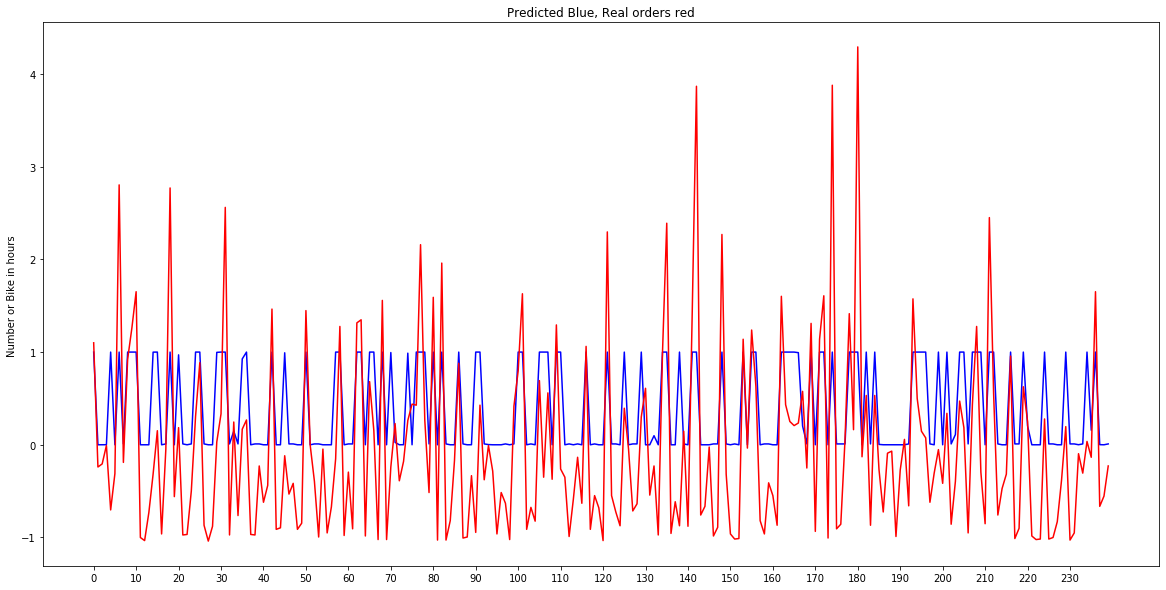

In [257]:
t=np.arange(240)
plt.figure(figsize=(20,10))
plt.ylabel('Number or Bike in hours ')
plt.title('Predicted Blue, Real orders red')
plt.plot(t,Test_predic[:240],'b-',t,y_test[:240],'r-')
plt.xticks(np.arange(0,240,10))
plt.show()